In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np
import pickle

from dynamic_reparameterization.DynamicReparameterizationNet import DynamicReparameterizationNet

In [2]:
dataset = "Duffing"

if dataset == "Alu":
    with open('data/alu/alu_train.pickle', 'rb') as f:
        train_data = pickle.load(f)

    with open('data/alu/alu_test.pickle', 'rb') as f:
        test_data = pickle.load(f)
        
if dataset == "Duffing":
    with open('data/duffing/duffing_train.pickle', 'rb') as f:
        train_data = pickle.load(f)

    with open('data/duffing/duffing_test.pickle', 'rb') as f:
        test_data = pickle.load(f)

In [3]:
t_train = torch.linspace(0, train_data.DT * len(train_data.x), len(train_data.y))
t_test = torch.linspace(0, test_data.DT * len(test_data.x), len(test_data.y))

train_loader = DataLoader(train_data, batch_size=100, shuffle=True)
test_loader = DataLoader(test_data, shuffle=True)

In [4]:
model = DynamicReparameterizationNet([3, 64, 64, 64, 2], H=0.001, sparsity=0.9, Np=1000, fractional_tolerence=0.1, verbose=False)

In [5]:
model.train_n_epochs(train_loader=train_loader, n_epochs=500, lr=0.01, weight_decay=0.001, epochs_reallocate=25)
model.train_n_epochs(train_loader=train_loader, n_epochs=500, lr=0.001, weight_decay=0.001, epochs_reallocate=100)
model.train_n_epochs(train_loader=train_loader, n_epochs=500, lr=0.0001, weight_decay=0.001, epochs_reallocate=250)
model.train_n_epochs(train_loader=train_loader, n_epochs=1000, lr=0.0001, weight_decay=0.001, epochs_reallocate=0)

Epoch 0: 0.6717237830162048
Sparsity: 0.9002584591507912 

Epoch 100: 4160.1708984375
Sparsity: 0.890625 

Epoch 200: 15497.466796875
Sparsity: 0.8818139061331749 

Epoch 300: 56782.1328125
Sparsity: 0.8855733051896095 

Epoch 400: 13857.4609375
Sparsity: 0.8959116563200951 

Epoch 0: 4726.7373046875
Sparsity: 0.8959116563200951 

Epoch 100: 0.2579951882362366
Sparsity: 0.8959116563200951 

Epoch 200: 15702.7490234375
Sparsity: 0.8959116563200951 

Epoch 300: 13191.8154296875
Sparsity: 0.8959116563200951 

Epoch 400: 13530.1748046875
Sparsity: 0.8959116563200951 

Epoch 0: 15037.869140625
Sparsity: 0.8959116563200951 

Epoch 100: 0.779017984867096
Sparsity: 0.8959116563200951 

Epoch 200: 0.34711509943008423
Sparsity: 0.8959116563200951 

Epoch 300: 21856.521484375
Sparsity: 0.8959116563200951 

Epoch 400: 22437.626953125
Sparsity: 0.8959116563200951 

Epoch 0: 22159.0859375
Sparsity: 0.8959116563200951 

Epoch 100: 1.4500378370285034
Sparsity: 0.8959116563200951 

Epoch 200: 0.3800828

In [6]:
y_pred = model(test_data.x).detach().numpy()

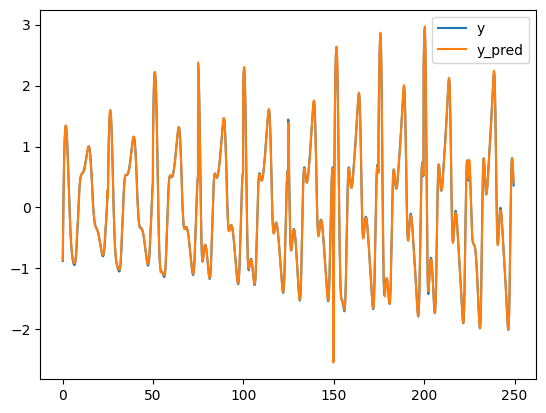

In [10]:
# plot y and y_pred
plt.plot(t_test, test_data.y[:, 0], label="y")
plt.plot(t_test, y_pred[:, 0], label="y_pred")
plt.legend()
plt.show()

In [11]:
model.get_layerwise_sparsity()

[tensor(0.0208), tensor(0.9302), tensor(0.9307), tensor(0.)]

In [12]:
model.get_sparsity()

0.8959116563200951